In [20]:
### Data Collection
import pandas_datareader as pdr
key="################################"

In [21]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [22]:
df.to_csv('AAPL.csv')

In [23]:
import pandas as pd

In [24]:
df=pd.read_csv('AAPL.csv')

In [25]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-25 00:00:00+00:00,99.44,101.5300,99.21,101.52,51794525,23.029169,23.513189,22.975903,23.510873,207178100,0.0,1.0
1,AAPL,2016-01-26 00:00:00+00:00,99.99,100.8800,98.07,99.93,75077002,23.156542,23.362656,22.711892,23.142647,300308008,0.0,1.0
2,AAPL,2016-01-27 00:00:00+00:00,93.42,96.6289,93.34,96.04,133369674,21.635005,22.378150,21.616478,22.241767,533478696,0.0,1.0
3,AAPL,2016-01-28 00:00:00+00:00,94.09,94.5200,92.39,93.79,55678825,21.790170,21.889753,21.396469,21.720693,222715300,0.0,1.0
4,AAPL,2016-01-29 00:00:00+00:00,97.34,97.3400,94.35,94.79,64416504,22.542833,22.542833,21.850383,21.952282,257666016,0.0,1.0


In [26]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-01-14 00:00:00+00:00,128.91,131.0000,128.760,130.80,90221755,128.91,131.0000,128.760,130.80,90221755,0.0,1.0
1254,AAPL,2021-01-15 00:00:00+00:00,127.14,130.2242,127.000,128.78,111598531,127.14,130.2242,127.000,128.78,111598531,0.0,1.0
1255,AAPL,2021-01-19 00:00:00+00:00,127.83,128.7100,126.938,127.78,90757329,127.83,128.7100,126.938,127.78,90757329,0.0,1.0
1256,AAPL,2021-01-20 00:00:00+00:00,132.03,132.4900,128.550,128.66,104319489,132.03,132.4900,128.550,128.66,104319489,0.0,1.0
1257,AAPL,2021-01-21 00:00:00+00:00,136.87,139.6700,133.590,133.80,120529544,136.87,139.6700,133.590,133.80,120529544,0.0,1.0


In [27]:
df1=df.reset_index()['close']
df1

0        99.44
1        99.99
2        93.42
3        94.09
4        97.34
         ...  
1253    128.91
1254    127.14
1255    127.83
1256    132.03
1257    136.87
Name: close, Length: 1258, dtype: float64

In [28]:
df1.shape

(1258,)

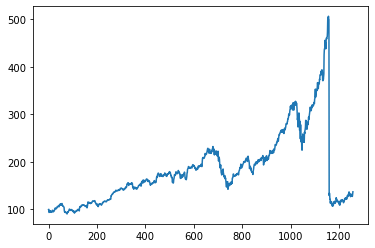

In [29]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [30]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [31]:
import numpy as np

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [33]:
df1

array([[0.02188815],
       [0.02321106],
       [0.0074083 ],
       ...,
       [0.09017438],
       [0.10027661],
       [0.11191822]])

In [34]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [35]:
training_size,test_size

(817, 441)

In [36]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [37]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [38]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [39]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [40]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 373ms/step - loss: 0.0071 - val_loss: 0.0518
Epoch 2/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0019 - val_loss: 0.0235
Epoch 3/100
12/12 [==============================] - 3s 238ms/step - loss: 6.8321e-04 - val_loss: 0.0211
Epoch 4/100
12/12 [==============================] - 3s 246ms/step - loss: 4.2589e-04 - val_loss: 0.0208
Epoch 5/100
12/12 [==============================] - 3s 247ms/step - loss: 3.8032e-04 - val_loss: 0.0196
Epoch 6/100
12/12 [==============================] - 3s 243ms/step - loss: 3.6535e-04 - val_loss: 0.0191
Epoch 7/100
12/12 [==============================] - 3s 241ms/step - loss: 3.4020e-04 - val_loss: 0.0187
Epoch 8/100
12/12 [==============================] - 3s 245ms/step - loss: 3.2355e-04 - val_loss: 0.0183
Epoch 9/100
12/12 [==============================] - 3s 241ms/step - loss: 3.2806e-04 - val_loss: 0.0178
Epoch 10/100
12/12 [==============================] - 3s 244ms/

In [45]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [46]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [47]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

163.22810371282588

In [48]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

249.2465601158619

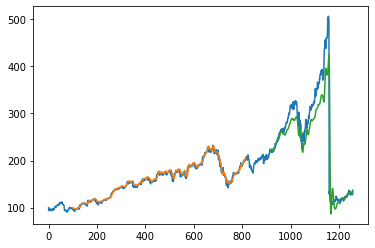

In [49]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
temp_input

[0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059242333132892344,
 0.06405291641611544,
 0.08192423331328924,
 0.07398677089597111,
 0.07420324714371618,
 0.07304870715574258,
 0.06898376428141911,
 0.061671677690920024,
 0.06535177390258567,
 0.06381238725195432,
 0.06111846061334936,
 0.059410703547805144,
 0.05943475646422125,
 0.06316295850871917,
 0.05017438364401683,
 0.06008418520745634,
 0.04454600120264579,
 0.044329

In [53]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0999381]
101
1 day input [0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.

11 day output [[0.11648665]]
12 day input [0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287
 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334
 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237
 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628 0.09226699
 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527
 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587
 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721
 0.08851473 0.0901743

22 day output [[0.12839971]]
23 day input [0.06361996 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233
 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376
 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476
 0.06316296 0.05017438 0.06008419 0.044546   0.04432952 0.04834636
 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425
 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975
 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.0999381
 0.1019454  0.1040121  0.10592814 0.10763891 0.10916522 0.11055127
 0.11183918 0.1130600

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

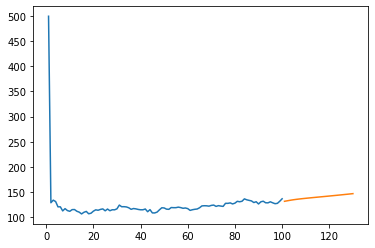

In [55]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

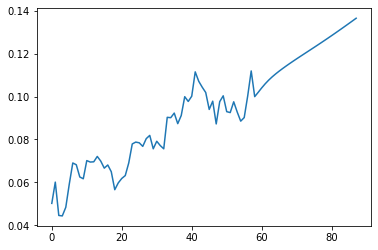

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

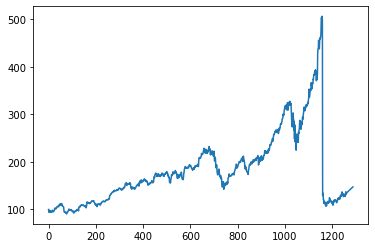

In [57]:
df3=scaler.inverse_transform(df3).tolist()

plt.plot(df3)